# Key Questions:

How many different segments of customers are there?

How are these segments different from each other?

What are your recommendations to the bank on how to better market to and service these customers?


# Data Description: 
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

Customer key - Identifier for the customer

Average Credit Limit - Average credit limit across all the credit cards

Total credit cards - Total number of credit cards

Total visits bank - Total number of bank visits

Total visits online - total number of online visits

Total calls made - Total number of calls made by the customer

# Steps to follow: 

1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)
3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)
4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)
5. Calculate average silhouette score for both methods. (5 marks)
6. Compare K-means clusters with Hierarchical clusters. (5 marks)
7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

In [1]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Not always recommended, but jsut so our notebook looks clean for this activity



from sklearn.cluster import KMeans
from scipy.stats import zscore


In [2]:
# Reading the given Credit Card Customer Data
df = pd.read_excel (r'Credit Card Customer Data.xlsx')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [6]:
# Basic Check

print ("Shape of Data")
print (df.shape)
print ("")
print ("Columns")
print (df.columns)
print ("")

Shape of Data
(660, 7)

Columns
Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [12]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [13]:
# Checking for duplicates
df.duplicated(subset=None, keep='first').sum()



0

# 1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)


# 2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)


In [17]:
# to check if we have any duplicate records for the same customer
for i,j in enumerate (df.columns):
    print ( 'column Name : %s' %str(j)+     ' -----> Unique : %s' %str(df[j].is_unique))

column Name : Sl_No -----> Unique : True
column Name : Customer Key -----> Unique : False
column Name : Avg_Credit_Limit -----> Unique : False
column Name : Total_Credit_Cards -----> Unique : False
column Name : Total_visits_bank -----> Unique : False
column Name : Total_visits_online -----> Unique : False
column Name : Total_calls_made -----> Unique : False


#### Insight:
     Customer Key is not unique

In [19]:
# to remove duplicate customer key and keep only their first row
df=df.drop_duplicates('Customer Key', keep='first')


In [20]:
for i,j in enumerate (df.columns):
    print ( 'column Name : %s' %str(j)+     ' -----> Unique : %s' %str(df[j].is_unique))

column Name : Sl_No -----> Unique : True
column Name : Customer Key -----> Unique : True
column Name : Avg_Credit_Limit -----> Unique : False
column Name : Total_Credit_Cards -----> Unique : False
column Name : Total_visits_bank -----> Unique : False
column Name : Total_visits_online -----> Unique : False
column Name : Total_calls_made -----> Unique : False


#### Insight:
     Customer Key is now unique

In [29]:
df.shape


(655, 7)

#### Insight
5 records are dropped from the original dataset

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                655 non-null    int64
 1   Customer Key         655 non-null    int64
 2   Avg_Credit_Limit     655 non-null    int64
 3   Total_Credit_Cards   655 non-null    int64
 4   Total_visits_bank    655 non-null    int64
 5   Total_visits_online  655 non-null    int64
 6   Total_calls_made     655 non-null    int64
dtypes: int64(7)
memory usage: 40.9 KB


In [24]:
df.describe()


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000
mean,329.450382,55058.158779,34242.748092,4.691603,2.401527,2.606107,3.601527
std,190.788562,25606.965469,37240.896986,2.169325,1.633648,2.940380,2.867352
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,164.500000,33623.500000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,328.000000,53898.000000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,494.500000,77084.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [25]:
# Storing the features related columns in a separate dataframe
df_features = df.iloc[:,2:]

In [26]:
df_features.shape

(655, 5)

In [28]:
df_features.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

##### To see the distribution of all continous variables:

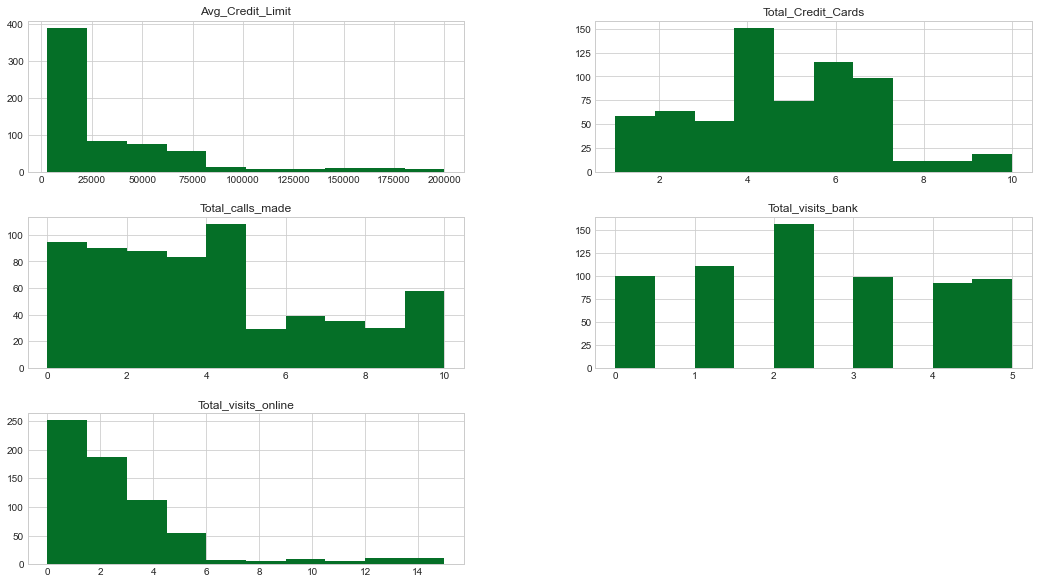

In [31]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
df_features[df_features.columns].hist(bins=10, figsize=(18,10), color='#056F27')
plt.show()

#### To see a pair plot of all features

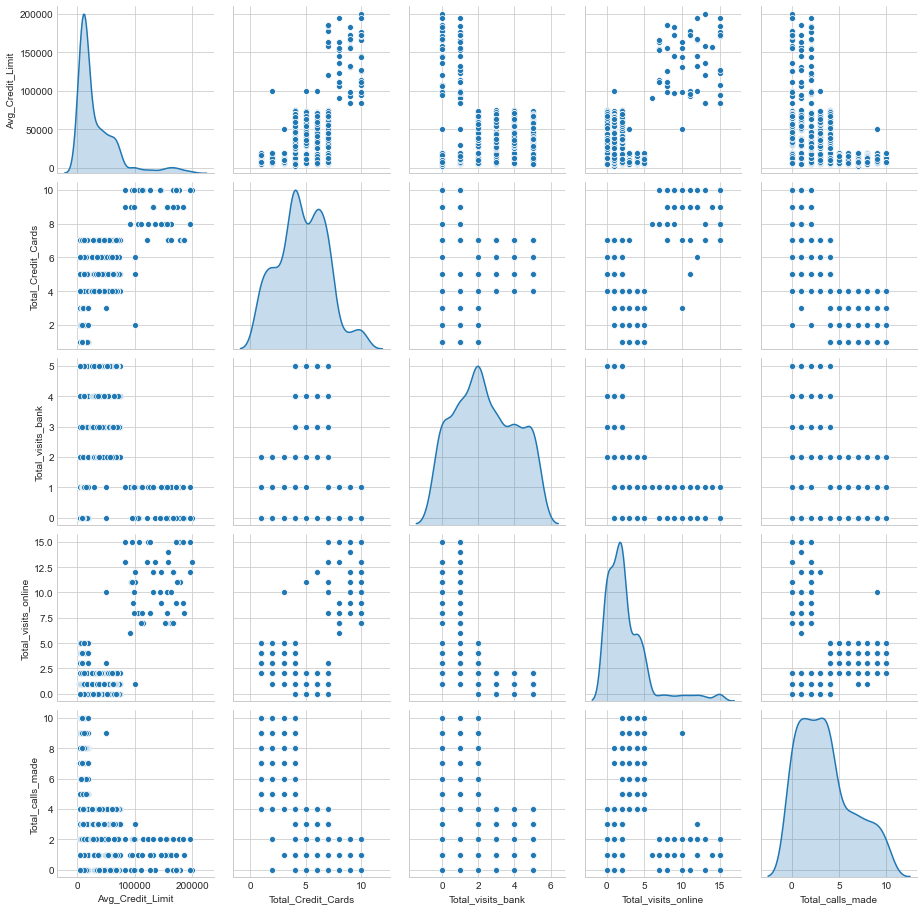

In [32]:
sns.pairplot(df_features,diag_kind='kde')

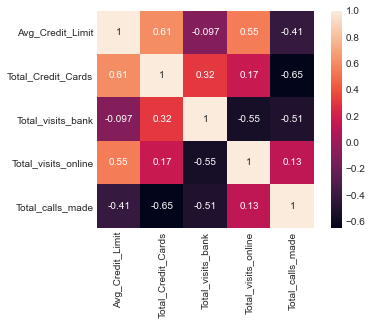

In [33]:
# build a feature correlation matrix
df_features_corr = df_features.corr()


# create a heatmap to display the correlations
sns.heatmap(df_features_corr, annot=True, square=True)


# Insight

No stronger correlation between these features and so chaces of colinearity is minimal

Looking at the univariate distribution, there can be atleast 3 to 4 clusters

In [116]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made',
       'GROUP'],
      dtype='object')

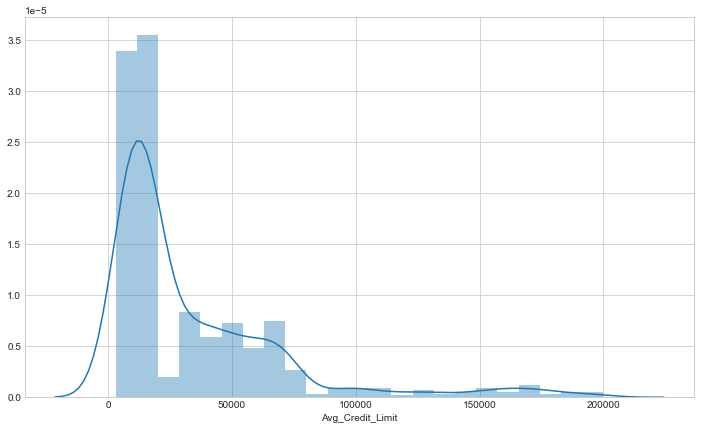

In [113]:
plt.figure(figsize=(12,7))
sns.distplot(df.Avg_Credit_Limit);

In [ ]:
Insight:
    Most of the customers have zero limit or less limit (skewed)

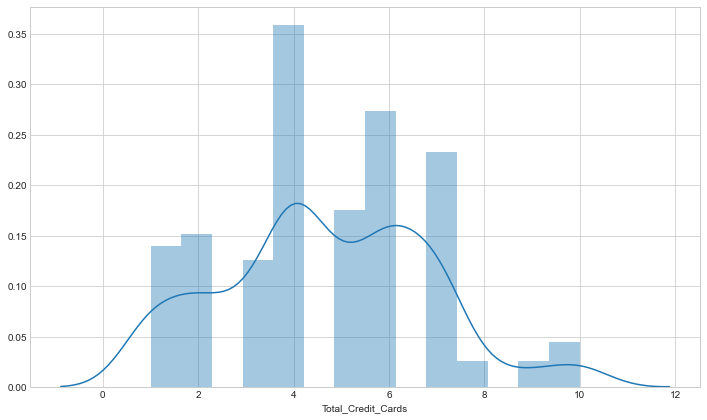

In [114]:
plt.figure(figsize=(12,7))
sns.distplot(df.Total_Credit_Cards);

In [ ]:
Insight:
    This variable looks to be normally distributed

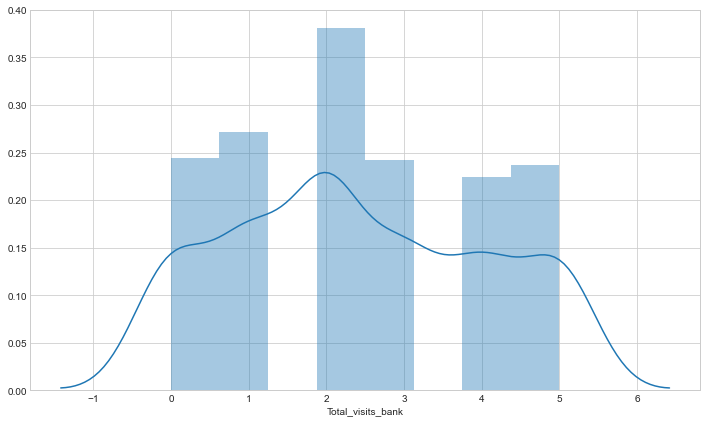

In [117]:
plt.figure(figsize=(12,7))
sns.distplot(df.Total_visits_bank);

In [ ]:
Insight:
    Total_visits_bank variable is again a normally distributed variable

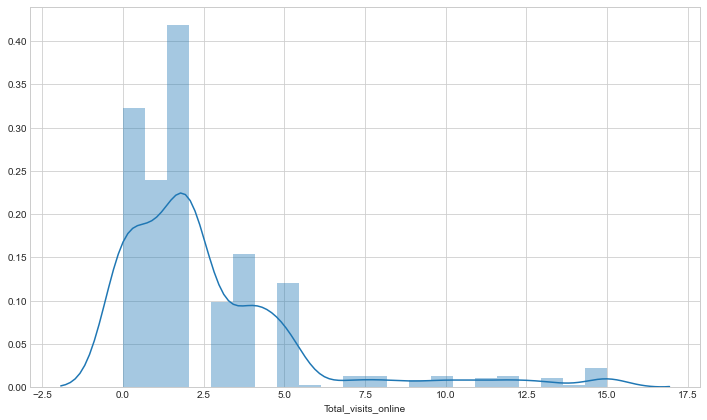

In [118]:
plt.figure(figsize=(12,7))
sns.distplot(df.Total_visits_online);

# 3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)


In [35]:
# step1 : Scaling
df_features_scaled=df_features.apply(zscore)



Text(0.5, 1.0, 'Selecting k with the Elbow Method')

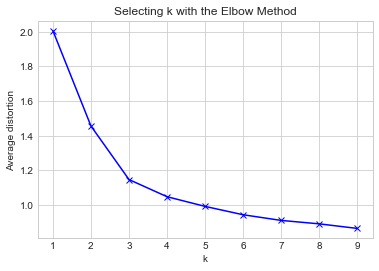

In [36]:

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_features_scaled)
    prediction=model.predict(df_features_scaled)
    meanDistortions.append(sum(np.min(cdist(df_features_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_features_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


In [37]:
####Insight:
Looking at the Elbow, we can either 2 or 3 or 4

In [52]:
# Initialize variables:
k_value=[]
sil_score=[]
K_Means_Score_Table={}




from sklearn.metrics import silhouette_score

# Let us first start with K = 2
k_value.append(2)
k_means_2_model =KMeans(2)
k_means_2_model.fit(df_features_scaled)
prediction_k2=k_means_2_model.predict(df_features_scaled)


#Append the prediction 
df_k_means_2 = df
df_k_means_2["GROUP"] = prediction_k2
df_features_scaled_k_means_2 = df_features_scaled
df_features_scaled_k_means_2["GROUP"] = prediction_k2
sil_score.append(silhouette_score(df_features_scaled_k_means_2, prediction_k2))



# Let us first start with K = 3
k_value.append(3)
k_means_3_model =KMeans(3)
k_means_3_model.fit(df_features_scaled)
prediction_k3=k_means_3_model.predict(df_features_scaled)

#Append the prediction 
df_k_means_3 = df
df_k_means_3["GROUP"] = prediction_k3
df_features_scaled_k_means_3 = df_features_scaled
df_features_scaled_k_means_3["GROUP"] = prediction_k3
sil_score.append(silhouette_score(df_features_scaled_k_means_3, prediction_k3))




# Let us first start with K = 4
k_value.append(4)
k_means_4_model =KMeans(4)
k_means_4_model.fit(df_features_scaled)
prediction_k4=k_means_4_model.predict(df_features_scaled)

#Append the prediction 
df_k_means_4 = df
df_k_means_4["GROUP"] = prediction_k4
df_features_scaled_k_means_4 = df_features_scaled
df_features_scaled_k_means_4["GROUP"] = prediction_k4
sil_score.append(silhouette_score(df_features_scaled_k_means_4, prediction_k4))


K_Means_Score_Table = {
    "k_value": k_value,
    "sil_score": sil_score,    
    }

K_Means_Score_Table = pd.DataFrame(K_Means_Score_Table)


In [103]:


# Let us first start with K = 3

k_means_3_model =KMeans(3)
k_means_3_model.fit(df_features_scaled)
prediction_k3=k_means_3_model.predict(df_features_scaled)

#Append the prediction 
df_k_means_3 = df
df_k_means_3["GROUP"] = prediction_k3
df_features_scaled_k_means_3 = df_features_scaled
df_features_scaled_k_means_3["GROUP"] = prediction_k3





In [57]:
K_Means_Score_Table


,k_value,sil_score
0,2,0.444816
1,3,0.539403
2,4,0.448153


#### Insight:
Higher the silhouette_score, better the clusters and so we can go with the K value =3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff53378d580>,
      dtype=object)

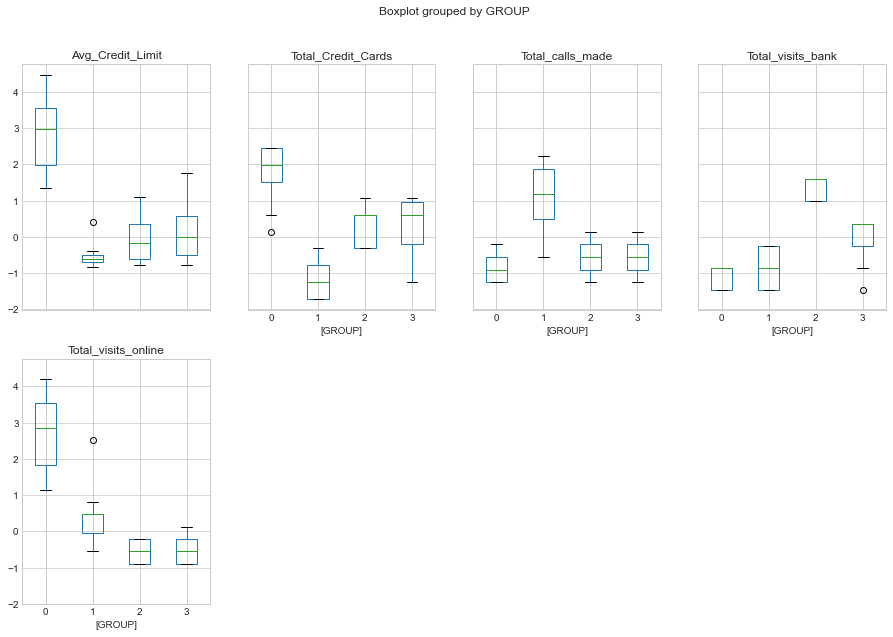

In [58]:

#Analyze by Boxplot:    
df_features_scaled_k_means_3.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

# 4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)


In [59]:
## Creating the cophenet score table for the different linkage methods

# Initialize variables:
method=[]
cophenet_score=[]
Score_Table={}

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [60]:
method.append("average")
Z1 = linkage(df_features_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z1 , pdist(df_features_scaled))
cophenet_score.append(c)

method.append("single")
Z2 = linkage(df_features_scaled, metric='euclidean', method='single')
c, coph_dists = cophenet(Z2 , pdist(df_features_scaled))
cophenet_score.append(c)


method.append("ward")
Z3 = linkage(df_features_scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z3 , pdist(df_features_scaled))
cophenet_score.append(c)


method.append("complete")
Z4 = linkage(df_features_scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z4 , pdist(df_features_scaled))
cophenet_score.append(c)


Score_Table = {
    "Method": method,
    "Cophenet_score": cophenet_score,    
    }

Score_Table = pd.DataFrame(Score_Table)


In [61]:
Score_Table

,Method,Cophenet_score
0,average,0.934209
1,single,0.915616
2,ward,0.797961
3,complete,0.925218


# Insight:
    Higher the cophenet score, better the clusters and so we can go with the average linkage method
    

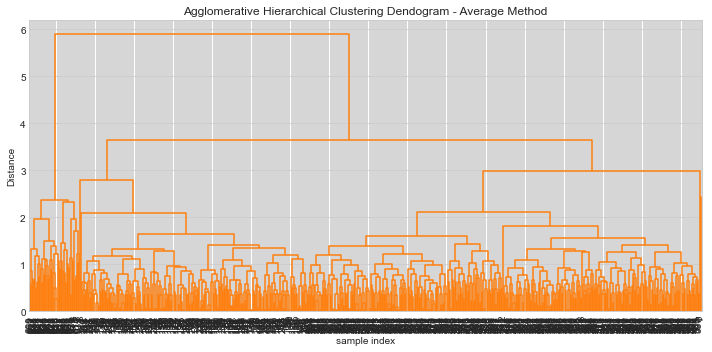

In [64]:
## Dendogram for the linkage method
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - Average Method')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z1, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

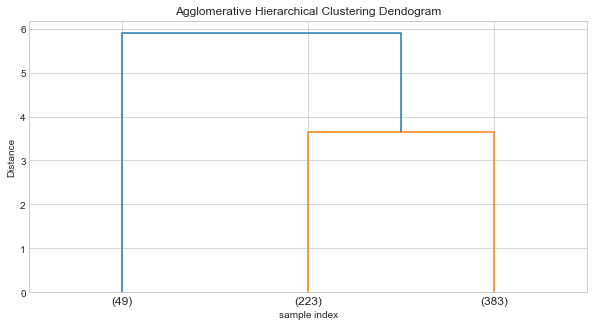

In [65]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z1,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()


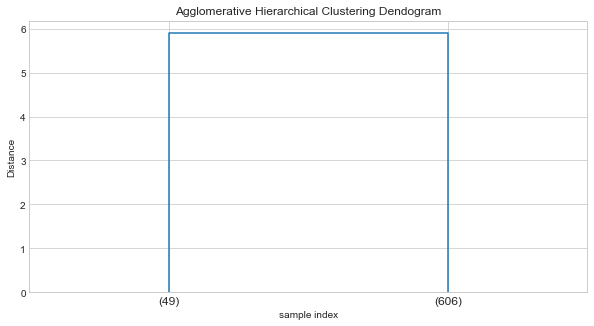

In [67]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z1,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=2,  # show only the last p merged clusters
)
plt.show()

#### Insight:
    Looking at the Dendogram, 2 size clusters look to be really skewed and so we can go with 3 size clusters

In [70]:
#Also, we can build some AgglomerativeClustering to find the optimum clusters

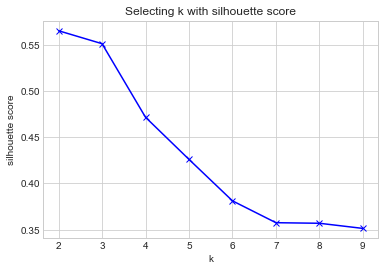

In [71]:
from sklearn.cluster import AgglomerativeClustering

# model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
# model.fit(cccd_scaled)

meanDistortions=[]

for k in range(2, 10):
    model=AgglomerativeClustering(n_clusters=k, affinity='euclidean',  linkage='average')
    model.fit(df_features_scaled)
    prediction=model.labels_
    meanDistortions.append(silhouette_score(df_features_scaled, prediction))
    


plt.plot(range(2, 10), meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Selecting k with silhouette score');

In [73]:
#Looking at silhouette_score, we can either go with 2 or 3

In [102]:
# Let us first start with K = 3
A_means_3_model =AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
A_means_3_model.fit(df_features_scaled)
prediction_A3=A_means_3_model.labels_

#Append the prediction 
df_A_means_3 = df
df_A_means_3["GROUP"] = prediction_A3
df_features_scaled_A_means_3 = df_features_scaled
df_features_scaled_A_means_3["GROUP"] = prediction_A3


In [86]:
df_features_scaled_A_means_3.groupby("GROUP").count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,383,383,383,383,383
1,49,49,49,49,49
2,223,223,223,223,223


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff508516250>,
      dtype=object)

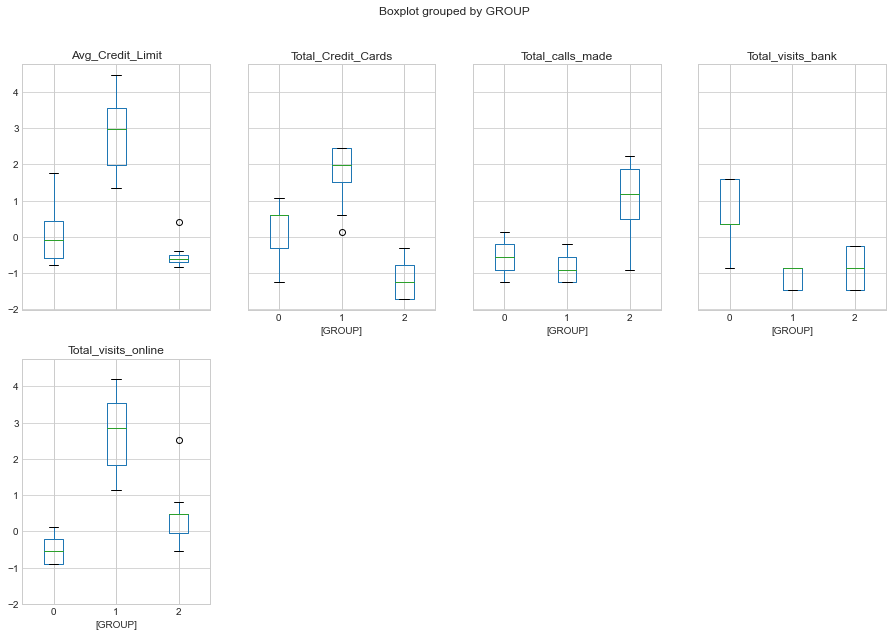

In [87]:
#Analyze by Boxplot:    
df_features_scaled_A_means_3.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [88]:

# Let us first start with K = 2
A_means_2_model =AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
A_means_2_model.fit(df_features_scaled)
prediction_A2=A_means_2_model.labels_

#Append the prediction 
df_A_means_2 = df
df_A_means_2["GROUP"] = prediction_A2
df_features_scaled_A_means_2 = df_features_scaled
df_features_scaled_A_means_2["GROUP"] = prediction_A2

In [89]:
df_features_scaled_A_means_2.groupby("GROUP").count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,606,606,606,606,606
1,49,49,49,49,49


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5083afc70>,
      dtype=object)

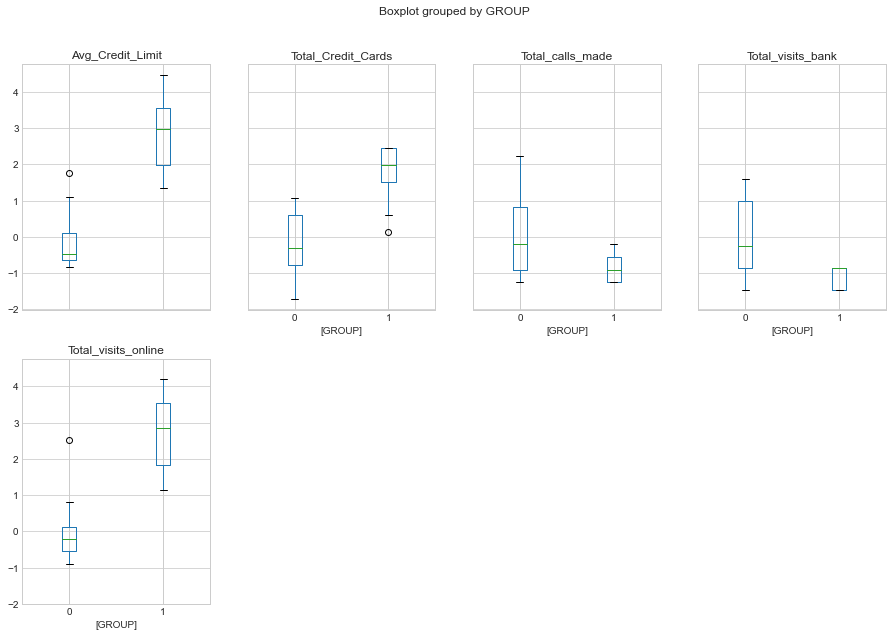

In [90]:
#Analyze by Boxplot:    
df_features_scaled_A_means_2.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

# 5. Calculate average silhouette score for both methods. (5 marks)


In [83]:
# To compute the silhouette_score for the different linkage methods

from scipy.cluster.hierarchy import fcluster
Z1_cl = fcluster(Z1,3,criterion='maxclust')
Z2_cl = fcluster(Z2,3,criterion='maxclust')
Z3_cl = fcluster(Z3,3,criterion='maxclust')
Z4_cl = fcluster(Z4,3,criterion='maxclust')

from sklearn.metrics import silhouette_score
print  (silhouette_score(df_features_scaled,Z1_cl , metric='euclidean'))
print  (silhouette_score(df_features_scaled,Z2_cl , metric='euclidean'))
print  (silhouette_score(df_features_scaled,Z3_cl , metric='euclidean'))
print  (silhouette_score(df_features_scaled,Z4_cl , metric='euclidean'))



0.5158849034818861
0.3750992052961897
0.5158849034818861
0.5158849034818861


# Insight
Higher the silhouette_score, better the clusters
And so Z1 (Avergare Linkage method looks to be a good coice)

# 6. Compare K-means clusters with Hierarchical clusters. (5 marks)


In [ ]:
Labelled dataframe output of slected clustering algorithm

#K means ----> df_features_scaled_k_means_3
#Hierarchial clustering (Average lnkage method) ---> df_features_scaled_A_means_3

In [94]:

#Let's compare by using silhouette_score to find the best clustering algorithm

print ('K means Clustering silhouette score')
print (silhouette_score(df_features_scaled_k_means_3, prediction_k3))

K means Clustering silhouette score
0.5158849034818861


In [95]:
print ('Algorithmetic Hierarchial silhouette score')
print (silhouette_score(df_features_scaled_A_means_3, prediction_A3))

Algorithmetic Hierarchial silhouette score
0.5162270457986816


In [104]:
#Comparing the counts:

df_features_scaled_k_means_3.groupby("GROUP").count()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,383,383,383,383,383
1,223,223,223,223,223
2,49,49,49,49,49


In [105]:
df_features_scaled_A_means_3.groupby("GROUP").count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,383,383,383,383,383
1,223,223,223,223,223
2,49,49,49,49,49


# Insight

Looking at the silhouette score and the count, both K-means and Hierarchial clustering looks to be very similar

# 7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff500635a60>,
      dtype=object)

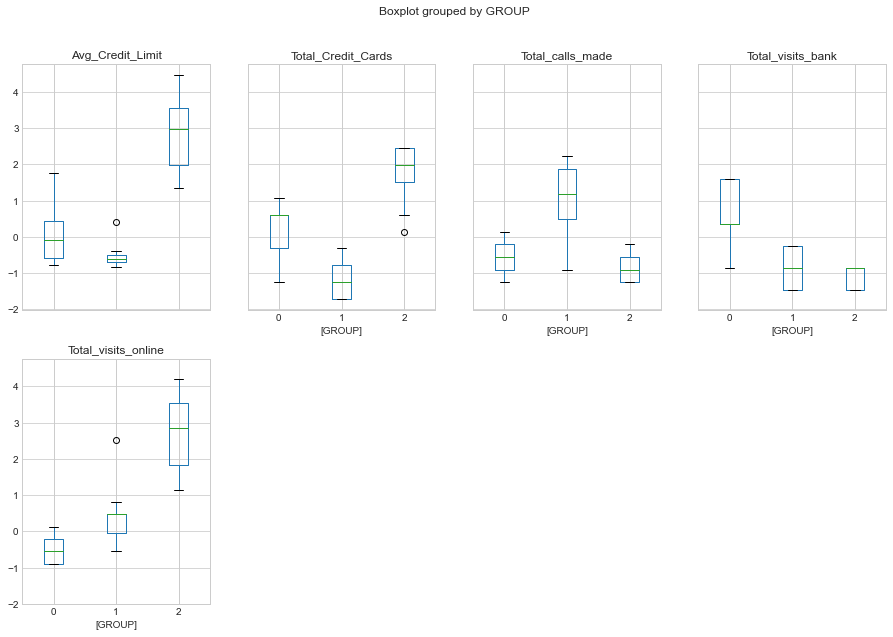

In [111]:
#Analyze by Boxplot:    
df_features_scaled_A_means_3.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

# Key questions & Insights::
    

    

# 1. How many different segments of customers are there?

    There are threr different customer segments
    
    cluster A - 383
    cluster B - 49
    Cluster C - 223


# 2. How are these segments different from each other?

    Cluster A:  Medium credit limit and Medium number of cards
                And they mostly visit Bank (when compared to online and call)
        
    Cluster B:  Low credit limit and Low number of cards
                And they most call-up customer service for any of their service requests
        
    Cluster C:  High credit limit and lower number of cards
                And they use online a lot (when compared to other channels)



# 3. What are your recommendations to the bank on how to better market to and service these customers?

As these customer segments have their own preference to contact bank via phone, online or in-person visit, Bank can use customer segment's preferred channel for better marketing